In [1]:
import pandas as pd
import yaml
import os

In [2]:
top_level_fields = ['repos', 'default_install_hook_types', 'default_language_version', 'default_stages', 'files', 'exclude', 'fail_fast', 'minimum_pre_commit_version']
top_level_fields.sort()

In [3]:

def create_pre_commit_row(pre_commit_yaml):
    pre_commit_row = {}

    for field in top_level_fields:
        if field in pre_commit_yaml:
            pre_commit_row[f'{field}_count'] = len(pre_commit_yaml[field]) if type(pre_commit_yaml[field]) is list else 1
        else:
            pre_commit_row[f'{field}_count'] = 0

    local_hooks = []
    remote_repoes = []
    remote_hooks = []
    for repo in pre_commit_yaml['repos']:
        if repo['repo'] == 'local':
            local_hooks = local_hooks + repo['hooks']
        else:
            remote_repoes.append(repo['repo'] )
            remote_hooks = remote_hooks + repo['hooks']

    pre_commit_row['local_hooks'] = [hook['id'] for hook in local_hooks]
    pre_commit_row['local_hooks_raw'] = local_hooks

    pre_commit_row['remote_repoes'] = remote_repoes
    pre_commit_row['remote_hooks'] = [hook['id'] for hook in remote_hooks]    
    pre_commit_row['remote_hooks_raw'] = remote_hooks
    pre_commit_row['is_valid'] = True
    pre_commit_row['raw_yaml'] = pre_commit_yaml
    return pre_commit_row
        


In [4]:
pre_commit_rows = []
folders = ['pre-commit-hooks', 'pre-commit-hooks-300-700', 'pre_commit_repos_800', 'found_hooks']

for folder in folders:
    for file_name in os.listdir(folder):
        path = os.path.join(folder, file_name)
        with open(path) as f:
            try:
                pre_commit_yaml = yaml.safe_load(f)
                if type(pre_commit_yaml) is list:
                    row = {'is_valid' : False}
                    pre_commit_rows.append(row)
                else:
                    row = create_pre_commit_row(pre_commit_yaml)
                pre_commit_rows.append(row)
            except yaml.YAMLError as ec:
                row = {'is_valid' : False}
                pre_commit_rows.append(row)
            except:
                row = {'is_valid' : False}
                pre_commit_rows.append(row)

In [5]:
pre_comit_df = pd.DataFrame(pre_commit_rows)

In [6]:
pre_comit_df.to_pickle('pre_commit_df.pkl')

In [7]:
pre_comit_df.columns

Index(['default_install_hook_types_count', 'default_language_version_count',
       'default_stages_count', 'exclude_count', 'fail_fast_count',
       'files_count', 'minimum_pre_commit_version_count', 'repos_count',
       'local_hooks', 'local_hooks_raw', 'remote_repoes', 'remote_hooks',
       'remote_hooks_raw', 'is_valid', 'raw_yaml'],
      dtype='object')

<Axes: ylabel='Count'>

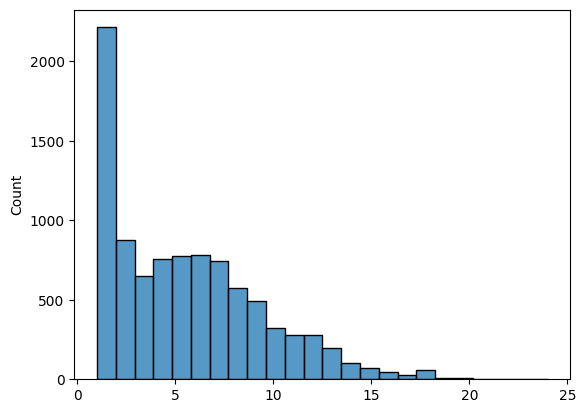

In [8]:
import seaborn as sns

sns.histplot(pre_comit_df[pre_comit_df['is_valid']].apply(lambda x : len(x['remote_hooks']) + len(x['local_hooks']), axis = 1), bins = 24)

<Axes: ylabel='Count'>

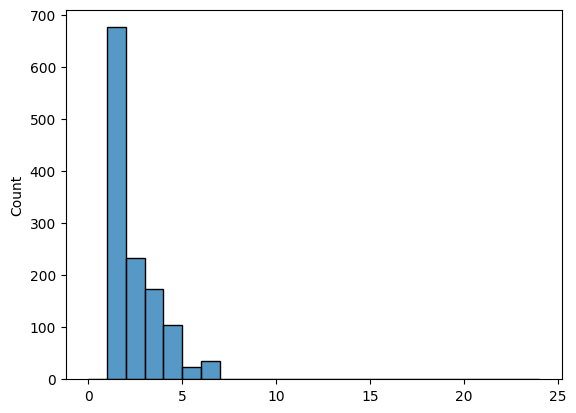

In [9]:
sns.histplot(pre_comit_df[pre_comit_df['is_valid'] & pre_comit_df['local_hooks'] != 0 ].apply(lambda x : len(x['local_hooks']), axis = 1), binrange=(0,24), bins = 24)

<Axes: ylabel='Count'>

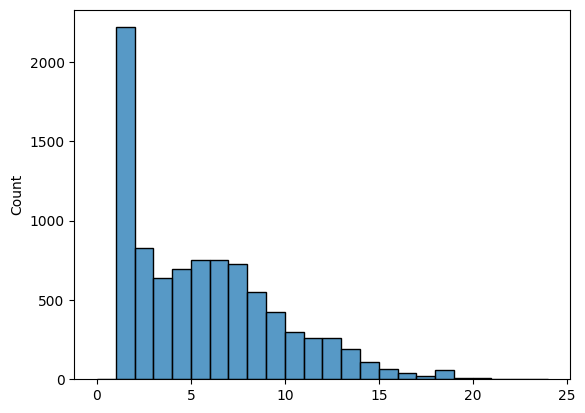

In [10]:
sns.histplot(pre_comit_df[pre_comit_df['is_valid']  & pre_comit_df['remote_hooks'] != 0].apply(lambda x : len(x['remote_hooks']), axis = 1), binrange=(0,24), bins = 24)